# Students Performance in Exams (Indicator)

## Life cycle of Machine learning Project
* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

### 1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### 2) Data Collection
* Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages

### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import the CSV Data as Pandas DataFrame

In [12]:
df = pd.read_csv('../Datasets/StudentsPerformance.csv')

In [15]:
#Import the CSV Data as Pandas DataFrame

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [33]:
# Renaming the columns
df.columns = ['Gender', 'Race_Ethnicity', 'Parental_Level_of_Education', 'Lunch', 'Test_Preparation_Course', 'Math_Score', 'Reading_Score', 'Writing_Score']

In [34]:
# Show Top 5 Records

df.shape

(1000, 8)

### 2.2 Dataset information
* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score

### 3. Data Checks to perform
* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
*Check various categories present in the different categorical column

In [35]:
# 3.1 Check Missing values

df.isna().sum()

Gender                         0
Race_Ethnicity                 0
Parental_Level_of_Education    0
Lunch                          0
Test_Preparation_Course        0
Math_Score                     0
Reading_Score                  0
Writing_Score                  0
dtype: int64

In [36]:
# 3.2 Check Duplicates

df.duplicated().sum()

0

There are no duplicates values in the data set

In [37]:
#3.3 Check data types

# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Gender                       1000 non-null   object
 1   Race_Ethnicity               1000 non-null   object
 2   Parental_Level_of_Education  1000 non-null   object
 3   Lunch                        1000 non-null   object
 4   Test_Preparation_Course      1000 non-null   object
 5   Math_Score                   1000 non-null   int64 
 6   Reading_Score                1000 non-null   int64 
 7   Writing_Score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [38]:
### 3.4 Checking the number of unique values of each column

df.nunique()

Gender                          2
Race_Ethnicity                  5
Parental_Level_of_Education     6
Lunch                           2
Test_Preparation_Course         2
Math_Score                     81
Reading_Score                  72
Writing_Score                  77
dtype: int64

In [39]:
# 3.5 Check statistics of data set

df.describe()

,Math_Score,Reading_Score,Writing_Score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight
* From above description of numerical data, all means are very close to each other - between 66 and 68.05;
* All standard deviations are also close - between 14.6 and 15.19;
* While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [40]:
### 3.6 Exploring Data
df.head()



,Gender,Race_Ethnicity,Parental_Level_of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [46]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['Gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['Race_Ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['Parental_Level_of_Education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['Lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['Test_Preparation_Course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [47]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['Math_Score', 'Reading_Score', 'Writing_Score']

We have 5 categorical features : ['Gender', 'Race_Ethnicity', 'Parental_Level_of_Education', 'Lunch', 'Test_Preparation_Course']


In [49]:
# 3.7 Adding columns for "Total Score" and "Average"

df['total_score'] = df['Math_Score'] + df['Reading_Score'] + df['Writing_Score']
df['average'] = df['total_score']/3
df.head()

,Gender,Race_Ethnicity,Parental_Level_of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [51]:
reading_full = df[df['Reading_Score'] == 100]['average'].count()
writing_full = df[df['Writing_Score'] == 100]['average'].count()
math_full = df[df['Math_Score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [52]:
reading_less_20 = df[df['Reading_Score'] <= 20]['average'].count()
writing_less_20 = df[df['Writing_Score'] <= 20]['average'].count()
math_less_20 = df[df['Math_Score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


### Insights
* From above values we get students have performed the worst in Maths
* Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion.
* Histogram
* Kernel Distribution Function (KDE)

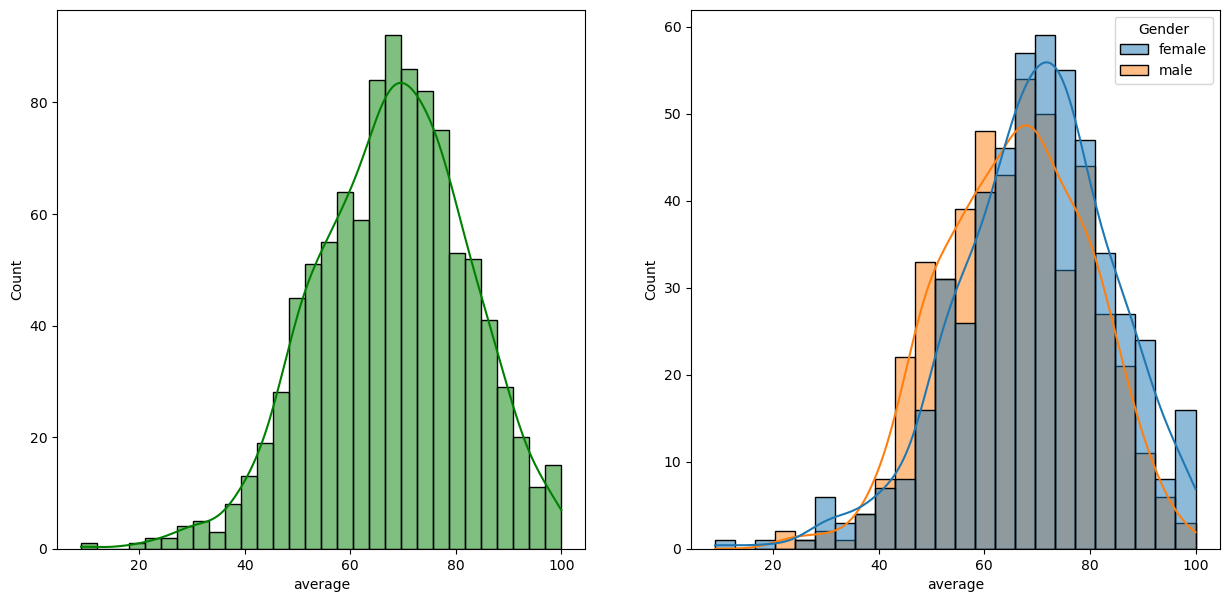

In [97]:
#4.1.1 Histogram & KDE

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='Gender')
plt.show()

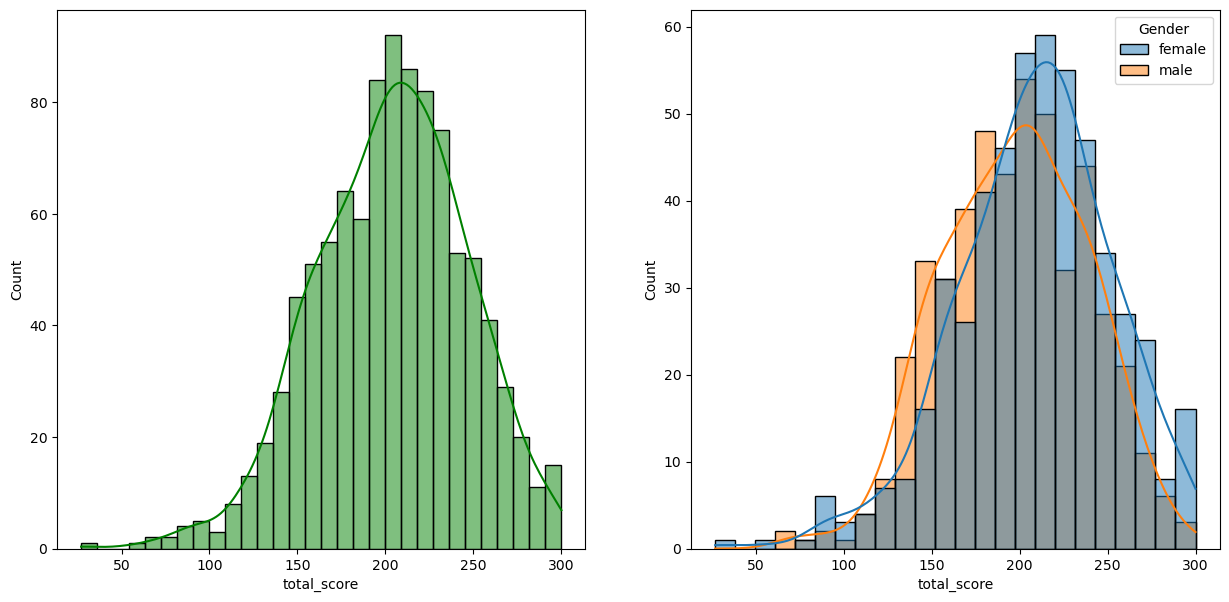

In [98]:

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='Gender')
plt.show()

#### Insights
* Female students tend to perform well then male students.

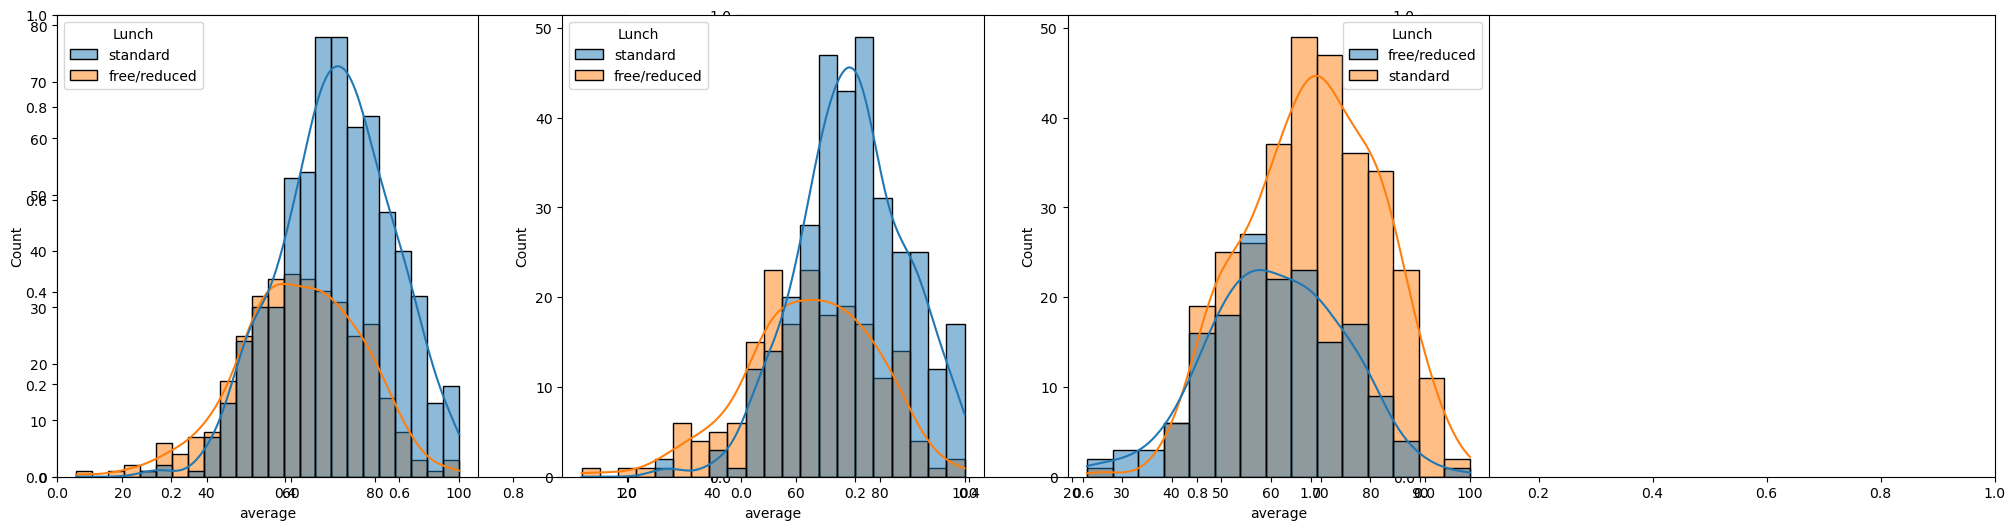

In [99]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='Lunch')
plt.subplot(142)
sns.histplot(data=df[df.Gender=='female'],x='average',kde=True,hue='Lunch')
plt.subplot(143)
sns.histplot(data=df[df.Gender=='male'],x='average',kde=True,hue='Lunch')
plt.show()

#### Insights
* Standard lunch helps perform well in exams.
* Standard lunch helps perform well in exams be it a male or a female.

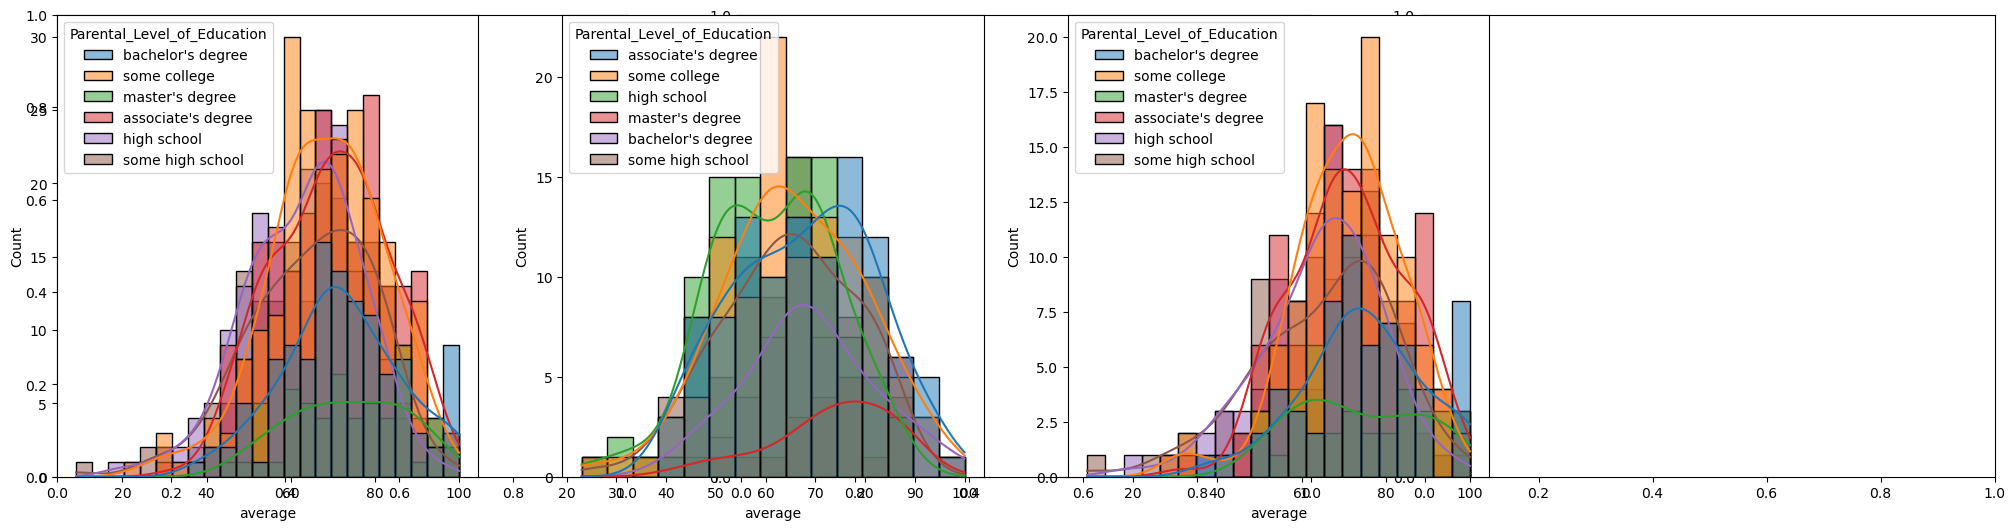

In [100]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='Parental_Level_of_Education')
plt.subplot(142)
ax =sns.histplot(data=df[df.Gender=='male'],x='average',kde=True,hue='Parental_Level_of_Education')
plt.subplot(143)
ax =sns.histplot(data=df[df.Gender=='female'],x='average',kde=True,hue='Parental_Level_of_Education')
plt.show()

#### Insights
* In general parent's education don't help student perform well in exam.
* 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
* 3rd plot we can see there is no effect of parent's education on female students.

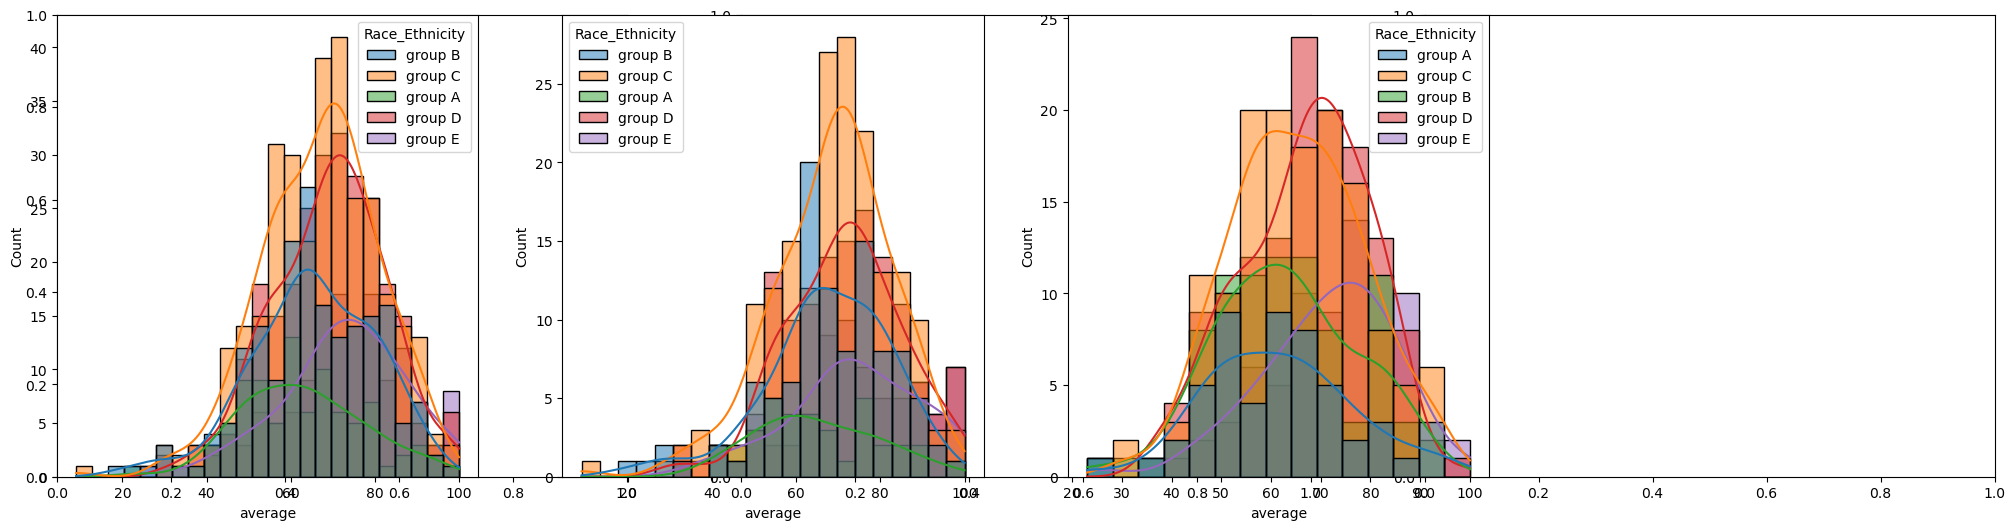

In [101]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='Race_Ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.Gender=='female'],x='average',kde=True,hue='Race_Ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.Gender=='male'],x='average',kde=True,hue='Race_Ethnicity')
plt.show()

In [102]:
df.head()

,Gender,Race_Ethnicity,Parental_Level_of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#### 4.2 Multivariate analysis using pieplot


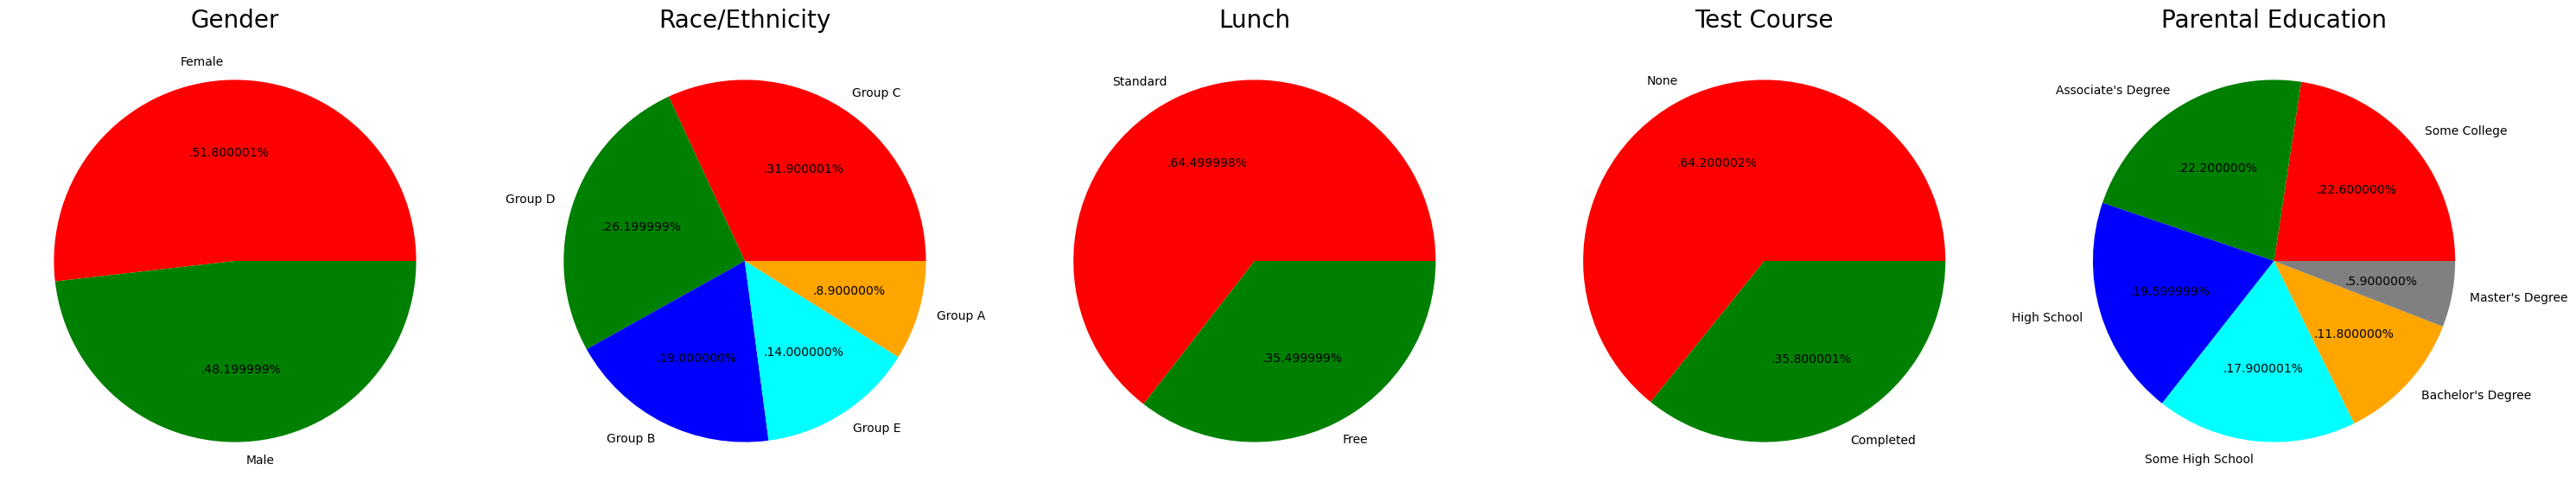

In [103]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['Gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['Race_Ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['Lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['Test_Preparation_Course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['Parental_Level_of_Education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### Insights
* Number of Male and Female students is almost equal
* Number students are greatest in Group C
* Number of students who have standard lunch are greater
* Number of students who have not enrolled in any test preparation course is greater
* Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.3 Feature Wise Visualization

##### 4.3.1 GENDER COLUMN
* How is distribution of Gender ?
* Is gender has any impact on student's performance ?



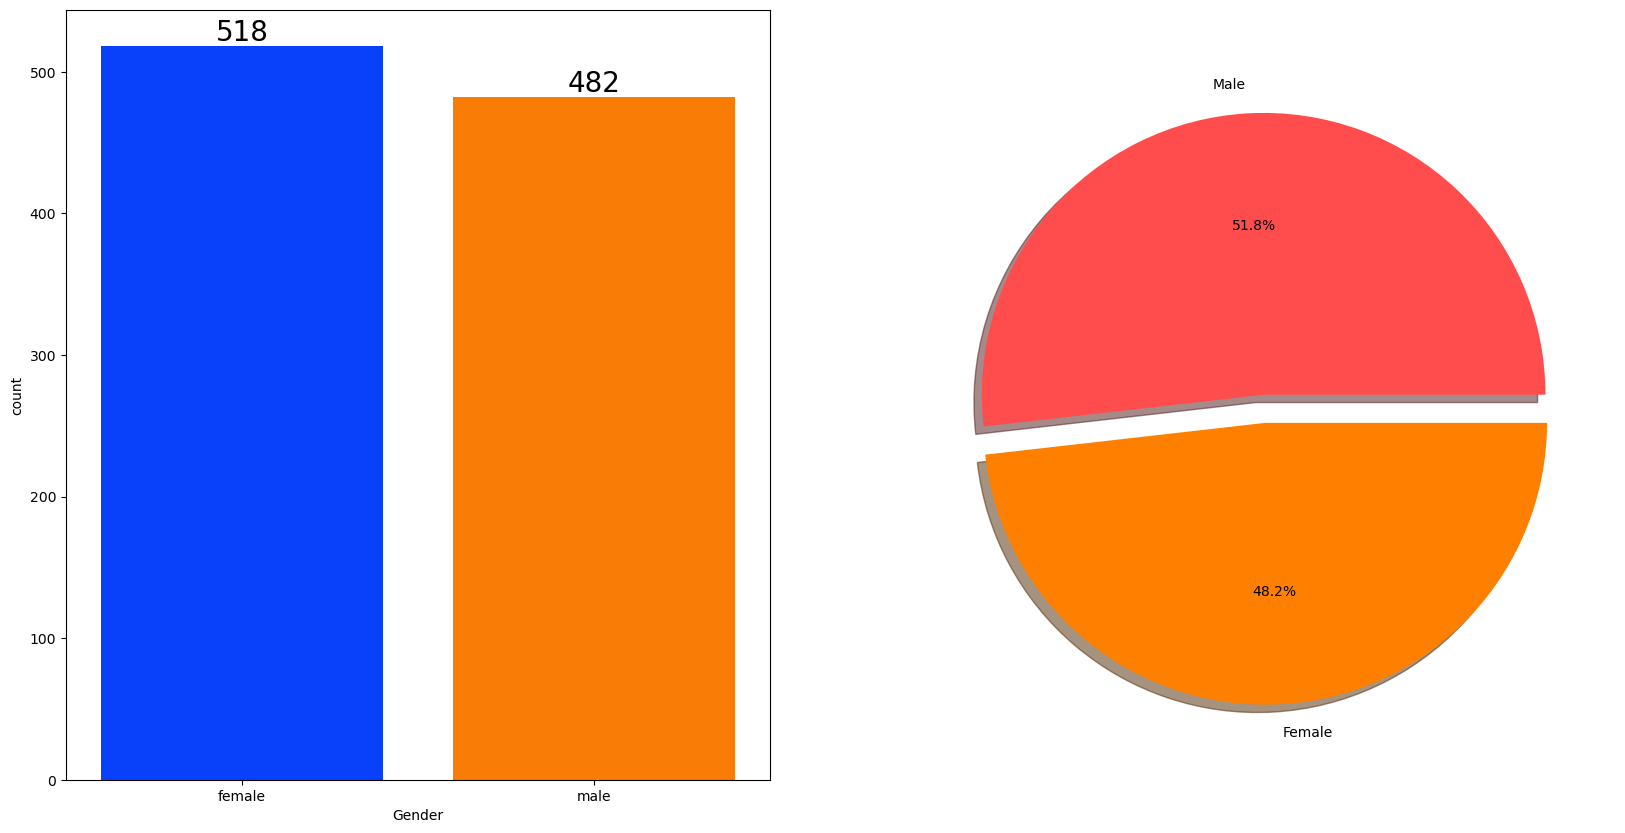

In [104]:
# UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['Gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights
* Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

In [108]:
# BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

gender_group = df.groupby('Gender')[['Math_Score', 'Reading_Score', 'Writing_Score']].mean()

gender_group['Total Average'] = gender_group.mean(axis=1)

gender_group

,Math_Score,Reading_Score,Writing_Score,Total Average
Gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


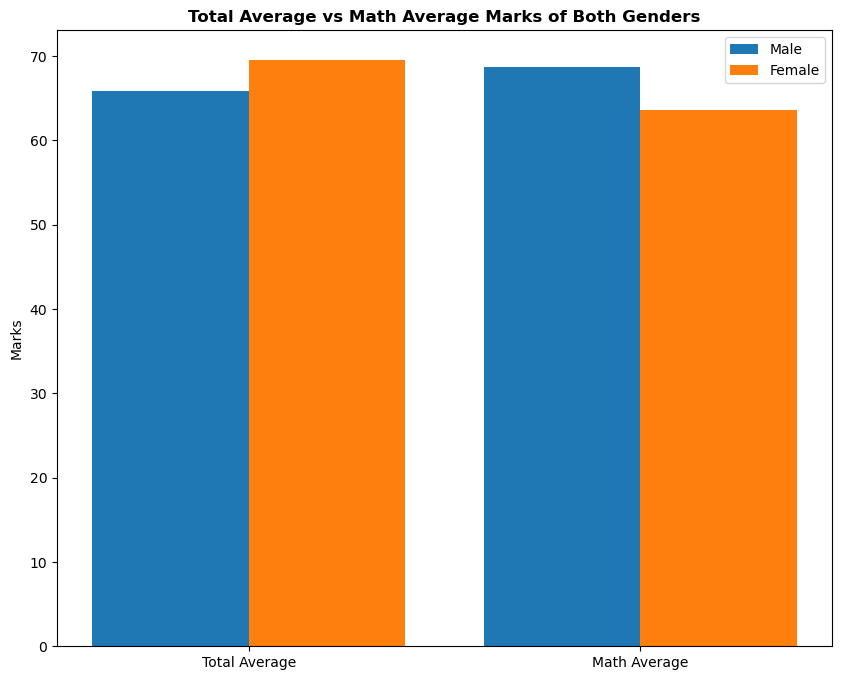

In [112]:
# Plotting the data
plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

female_scores = [gender_group.loc['female', 'Total Average'], gender_group.loc['female', 'Math_Score']]
male_scores = [gender_group.loc['male', 'Total Average'], gender_group.loc['male', 'Math_Score']]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total Average vs Math Average Marks of Both Genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights
* On an average females have a better overall score than men.
* whereas males have scored higher in Maths.

##### 4.3.2 RACE/EHNICITY COLUMN
* How is Group wise distribution ?
* Is Race/Ehnicity has any impact on student's performance ?



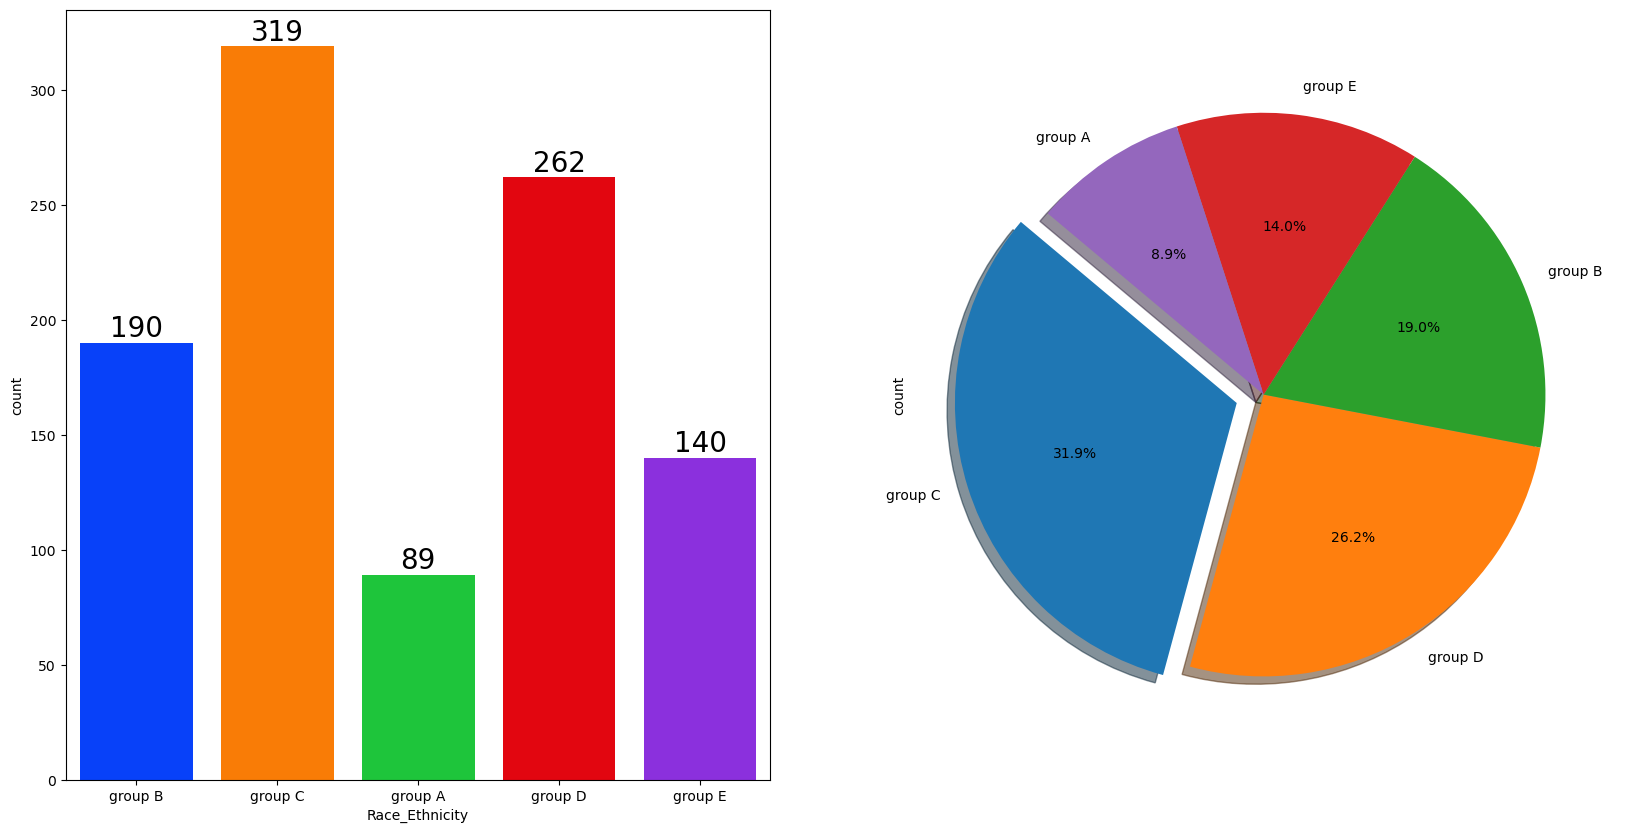

In [121]:
# UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

# Plot setup
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Bar plot
sns.countplot(x='Race_Ethnicity', data=df, palette='bright', ax=ax[0], saturation=0.95)
ax[0].bar_label(ax[0].containers[0], color='black', size=20)

# Pie chart
df['Race_Ethnicity'].value_counts().plot.pie(
    ax=ax[1],
    explode=[0.1, 0, 0, 0, 0],
    autopct='%1.1f%%',
    shadow=True,
    startangle=140
)

# Display the plot
plt.show()

#### Insights
* Most of the student belonging from group C /group D.
* Lowest number of students belong to groupA.

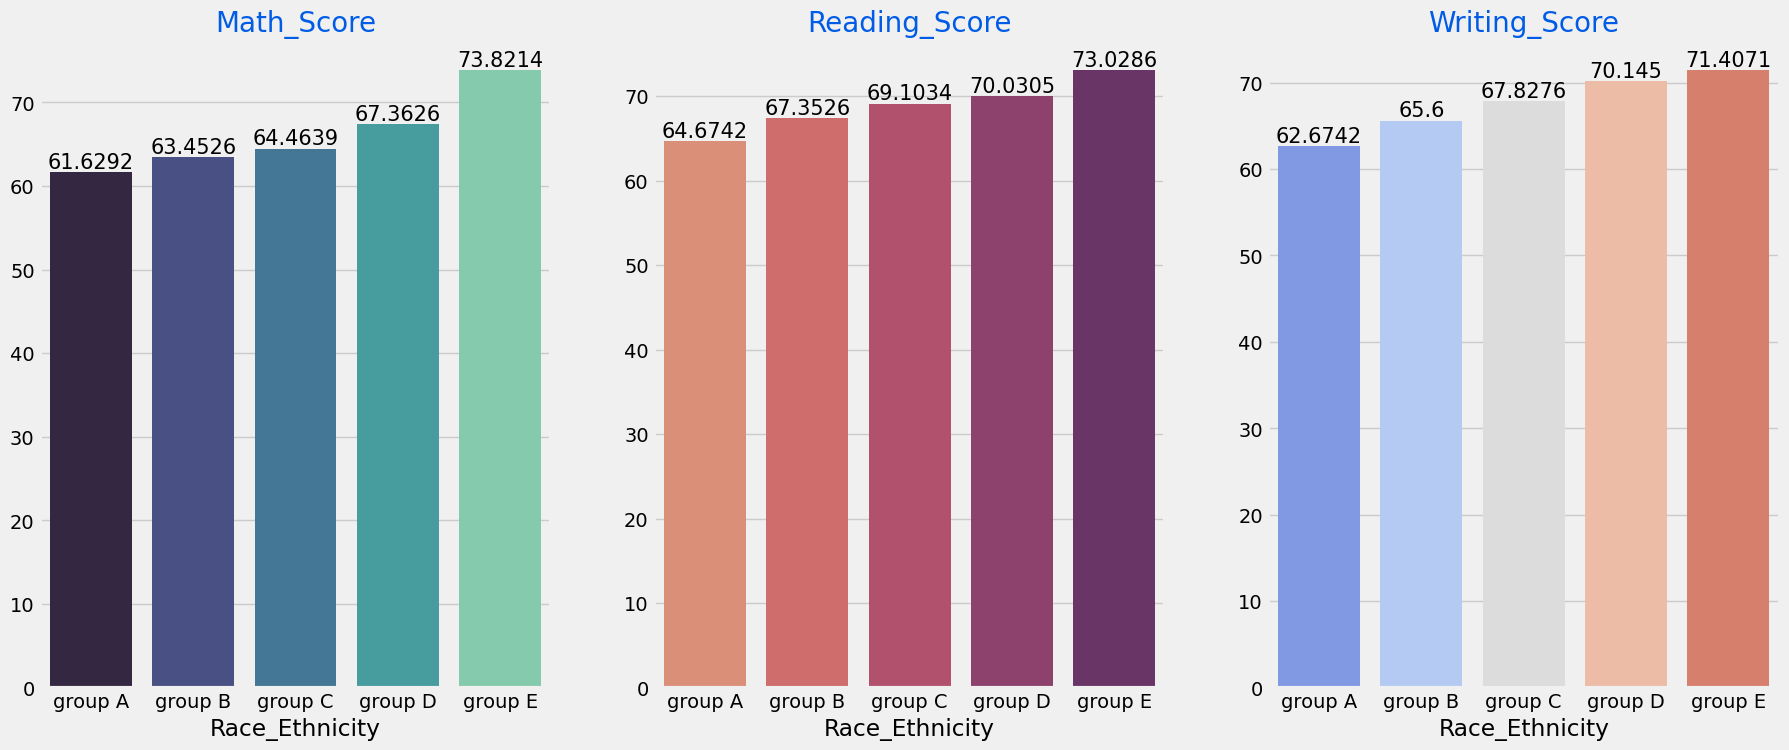

In [132]:
# BIVARIATE ANALYSIS ( Is Race_Ehnicity has any impact on student's performance ? )

# Group by race/ethnicity
Group_data2 = df.groupby('Race_Ethnicity')
# Plot setup
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Titles and palettes for each subplot
titles = ['Math_Score', 'Reading_Score', 'Writing_Score']
palettes = ['mako', 'flare', 'coolwarm']
scores = ['Math_Score', 'Reading_Score', 'Writing_Score']

# Loop to create each bar plot
for i, score in enumerate(scores):
    sns.barplot(
        x=Group_data2[score].mean().index,
        y=Group_data2[score].mean().values,
        palette=palettes[i],
        ax=ax[i]
    )
    ax[i].set_title(titles[i], color='#005ce6', size=20)
    ax[i].bar_label(ax[i].containers[0], color='black', size=15)

# Display plot
plt.show()

#### Insights
* Group E students have scored the highest marks.
* Group A students have scored the lowest marks.

##### 4.3.3 PARENTAL LEVEL OF EDUCATION COLUMN
* What is educational background of student's parent ?
* Is parental education has any impact on student's performance ?


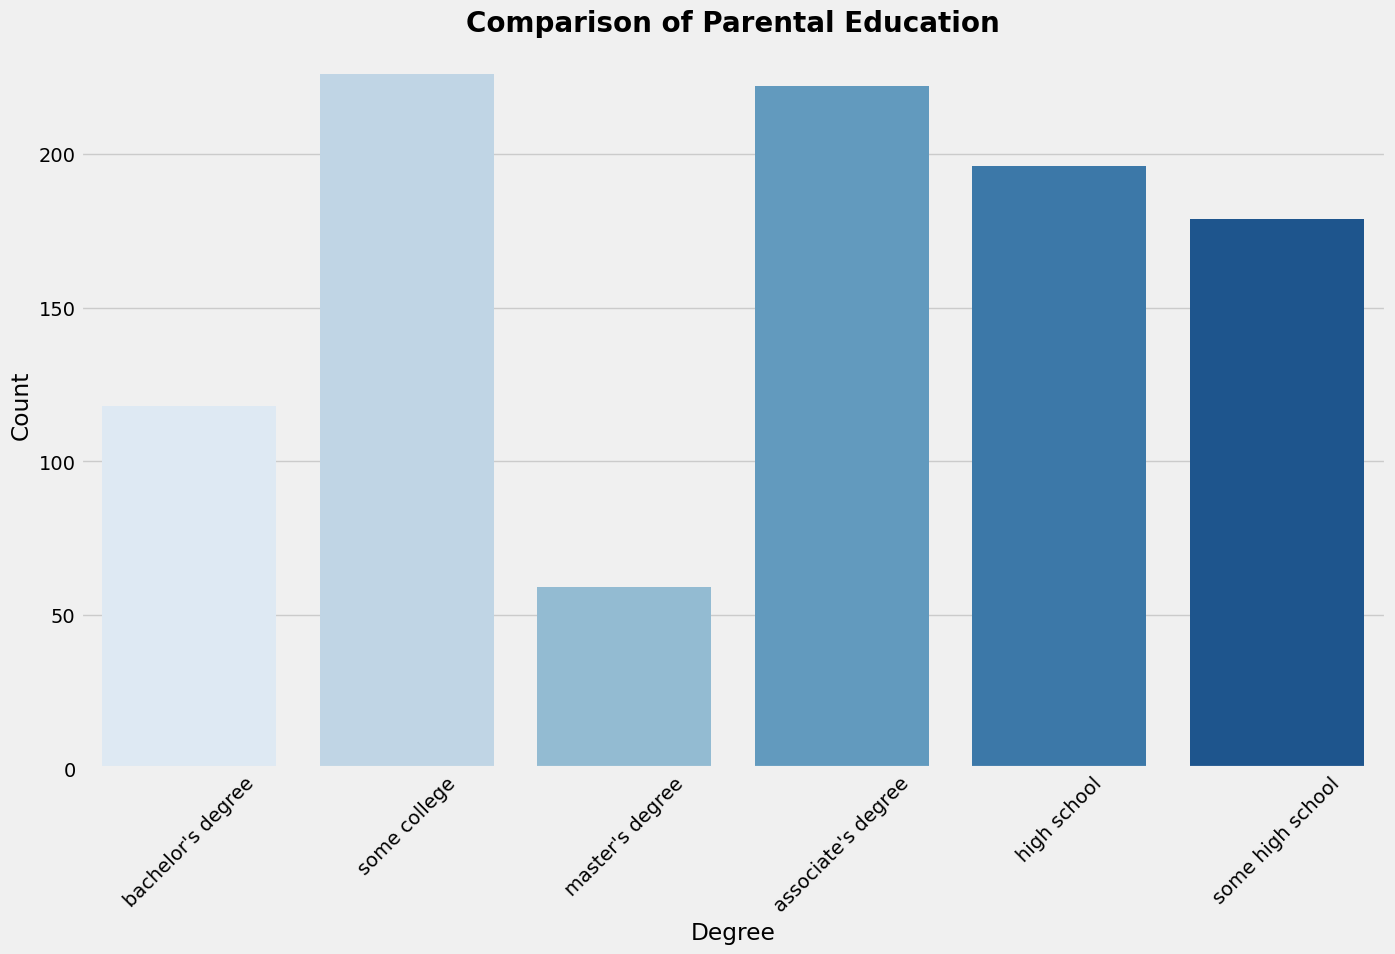

In [130]:
# UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

# Set plot style and size
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

# Plot the count plot for Parental Level of Education
sns.countplot(x='Parental_Level_of_Education', data=df, palette='Blues')

# Add titles and labels
plt.title('Comparison of Parental Education', fontweight='bold', fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()

#### Insights
* Largest number of parents are from some college.

### 4.3.4 LUNCH COLUMN
* Which type of lunch is most common amoung students ?

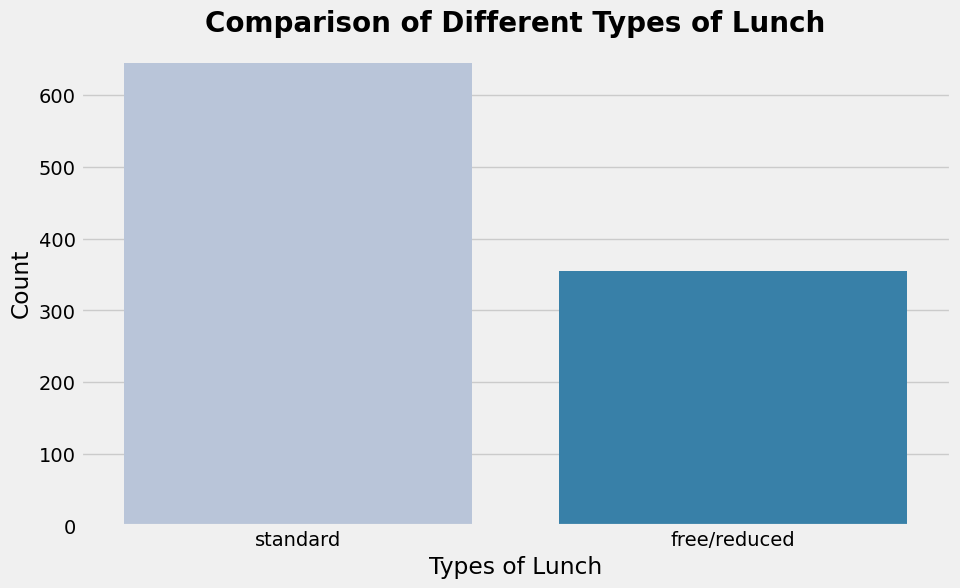

In [147]:
# UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

# UNIVARIATE ANALYSIS ( Which type of lunch is most common among students? )
plt.figure(figsize=(10, 6))
sns.countplot(x='Lunch', data=df, palette='PuBu')
plt.title('Comparison of Different Types of Lunch', fontweight='bold', fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')

# Show plot
plt.show()

##### 4.3.5 TEST PREPARATION COURSE COLUMN
* Which type of lunch is most common amoung students ?
* Is Test prepration course has any impact on student's performance ?

<Axes: xlabel='Lunch', ylabel='Writing_Score'>

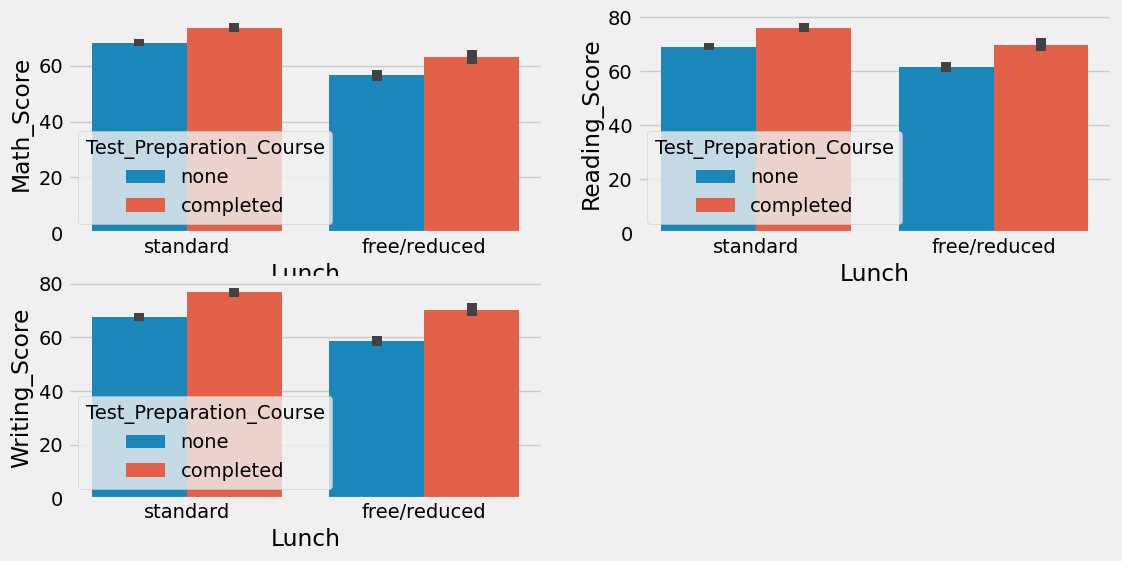

In [141]:
# BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['Lunch'], y=df['Math_Score'], hue=df['Test_Preparation_Course'])
plt.subplot(2,2,2)
sns.barplot (x=df['Lunch'], y=df['Reading_Score'], hue=df['Test_Preparation_Course'])
plt.subplot(2,2,3)
sns.barplot (x=df['Lunch'], y=df['Writing_Score'], hue=df['Test_Preparation_Course'])

#### Insights
* Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

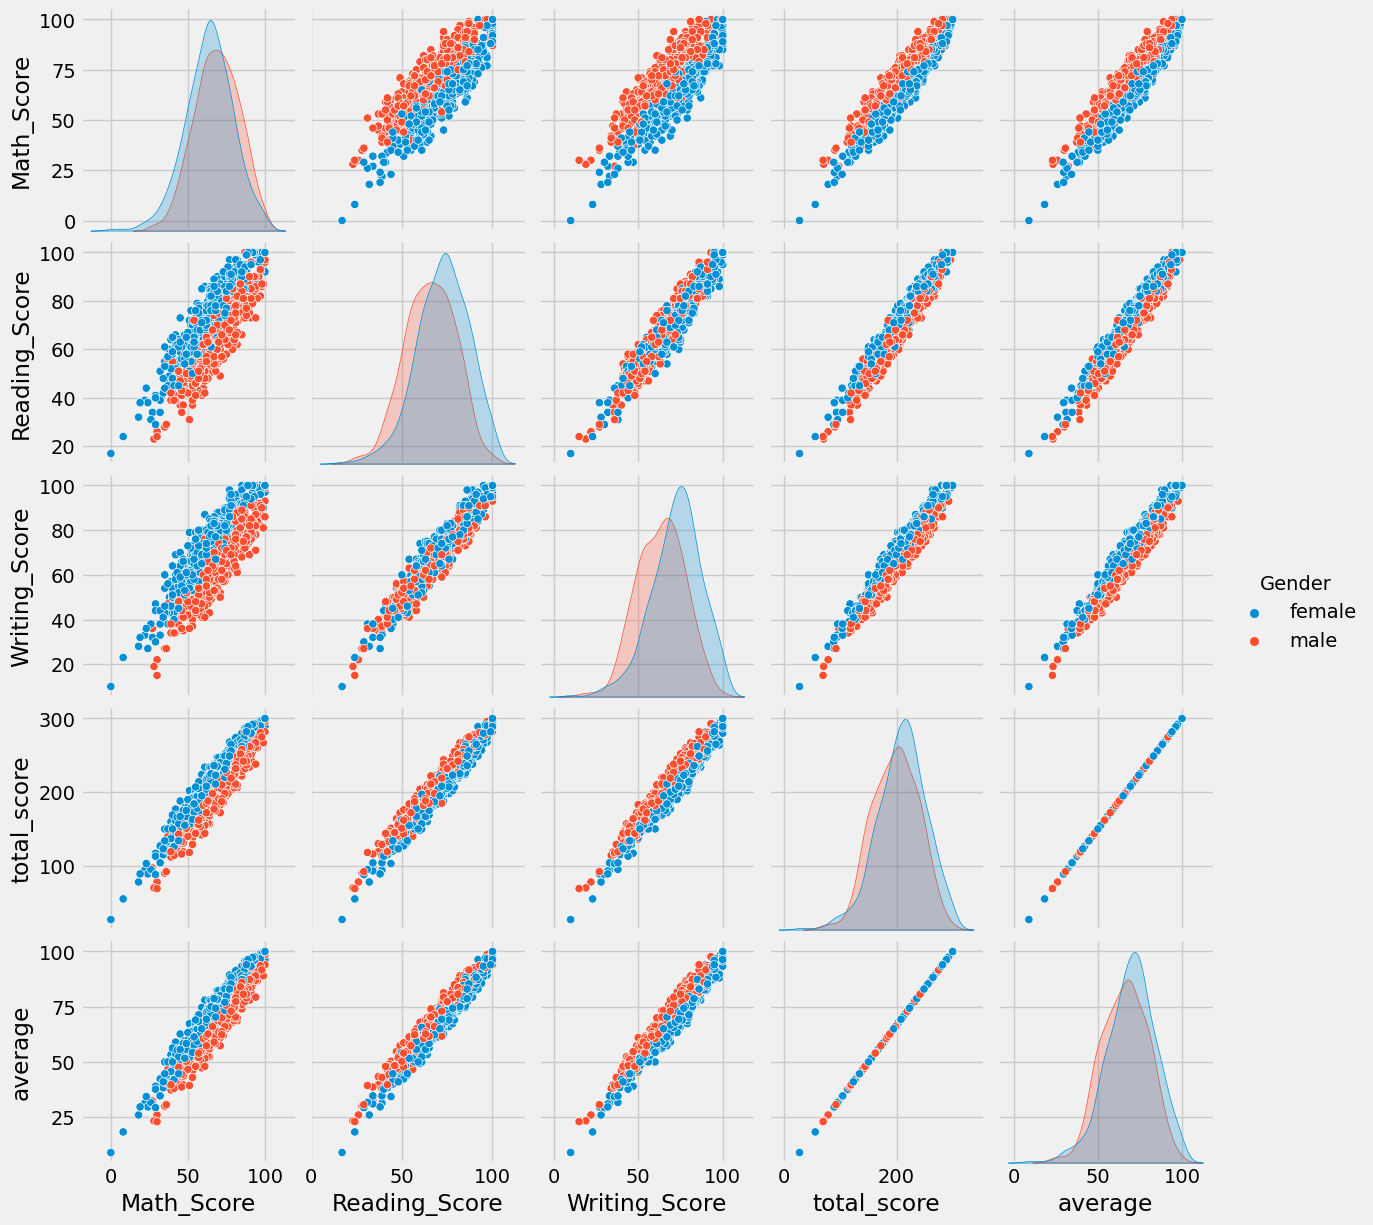

In [134]:
sns.pairplot(df,hue = 'Gender')
plt.show()

#### Insights
* From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
* Student's Performance is related with lunch, race, parental level education
* Females lead in pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course

### 6. Model Training

#### 6.1 Import Data and Required Packages
* Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [197]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

#### 6.2 Preparing X and Y variables

In [232]:
df = pd.read_csv('../Datasets/StudentsPerformance.csv')

# Renaming the columns
df.columns = ['Gender', 'Race_Ethnicity', 'Parental_Level_of_Education', 'Lunch', 'Test_Preparation_Course', 'Math_Score', 'Reading_Score', 'Writing_Score']

df.head(5)

,Gender,Race_Ethnicity,Parental_Level_of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [233]:
X = df.drop(columns=['Math_Score'],axis=1)

X.head()

,Gender,Race_Ethnicity,Parental_Level_of_Education,Lunch,Test_Preparation_Course,Reading_Score,Writing_Score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [234]:
y = df['Math_Score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: Math_Score, Length: 1000, dtype: int64

In [235]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Identify numeric and categorical features
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

# Define transformers
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ],
    remainder='passthrough'  # handle remaining columns (if any)
)

# Fit and transform data
X_transformed = preprocessor.fit_transform(X)

In [236]:
X = preprocessor.fit_transform(X)

In [237]:
X.shape

(1000, 19)

In [238]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [239]:
# Models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    # "Lasso": Lasso(),
    # "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    # "AdaBoost Regressor": AdaBoostRegressor()
}

# Lists to store model names and R2 scores
model_list = []
r2_list = []

# Iterate over models
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics manually
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)

    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = r2_score(y_test, y_test_pred)

    # Print results
    print(name)
    model_list.append(name)
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(train_mae))
    print("- R2 Score: {:.4f}".format(train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(test_mae))
    print("- R2 Score: {:.4f}".format(test_r2))
    r2_list.append(test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7088
- Mean Absolute Error: 4.5177
- R2 Score: 0.8554
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.2494
- Mean Absolute Error: 5.6090
- R2 Score: 0.7840


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.0941
- Mean Absolute Error: 6.4450
- R2 Score: 0.7308


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 2.3043
- Mean Absolute Error: 1.8347
- R2 Score: 0.97

### Linear Regression Model

In [241]:
lin_model = LinearRegression(fit_intercept=True)
# Train the model
lin_model = lin_model.fit(X_train, y_train)
# Make predictions
y_pred = lin_model.predict(X_test)
# Evaluate the model
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


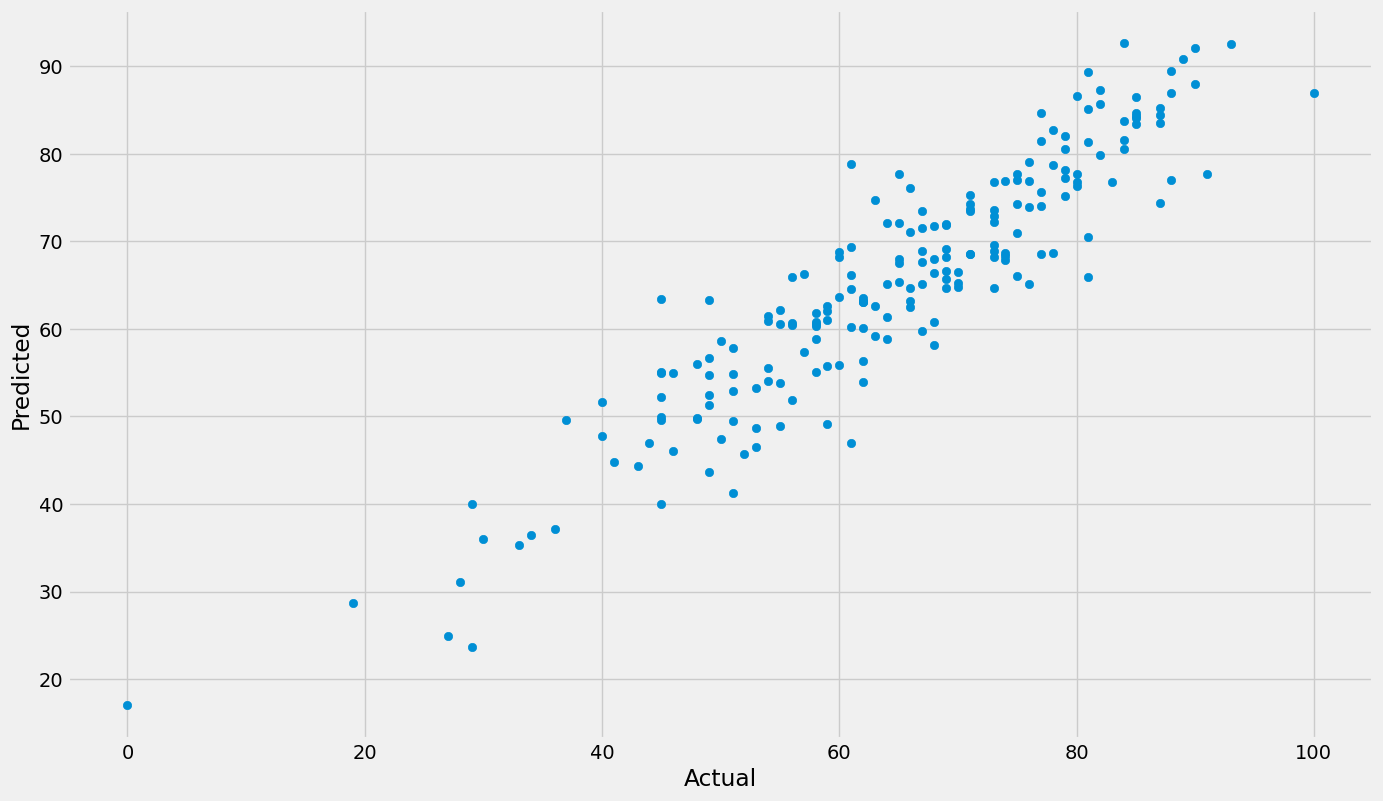

In [246]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

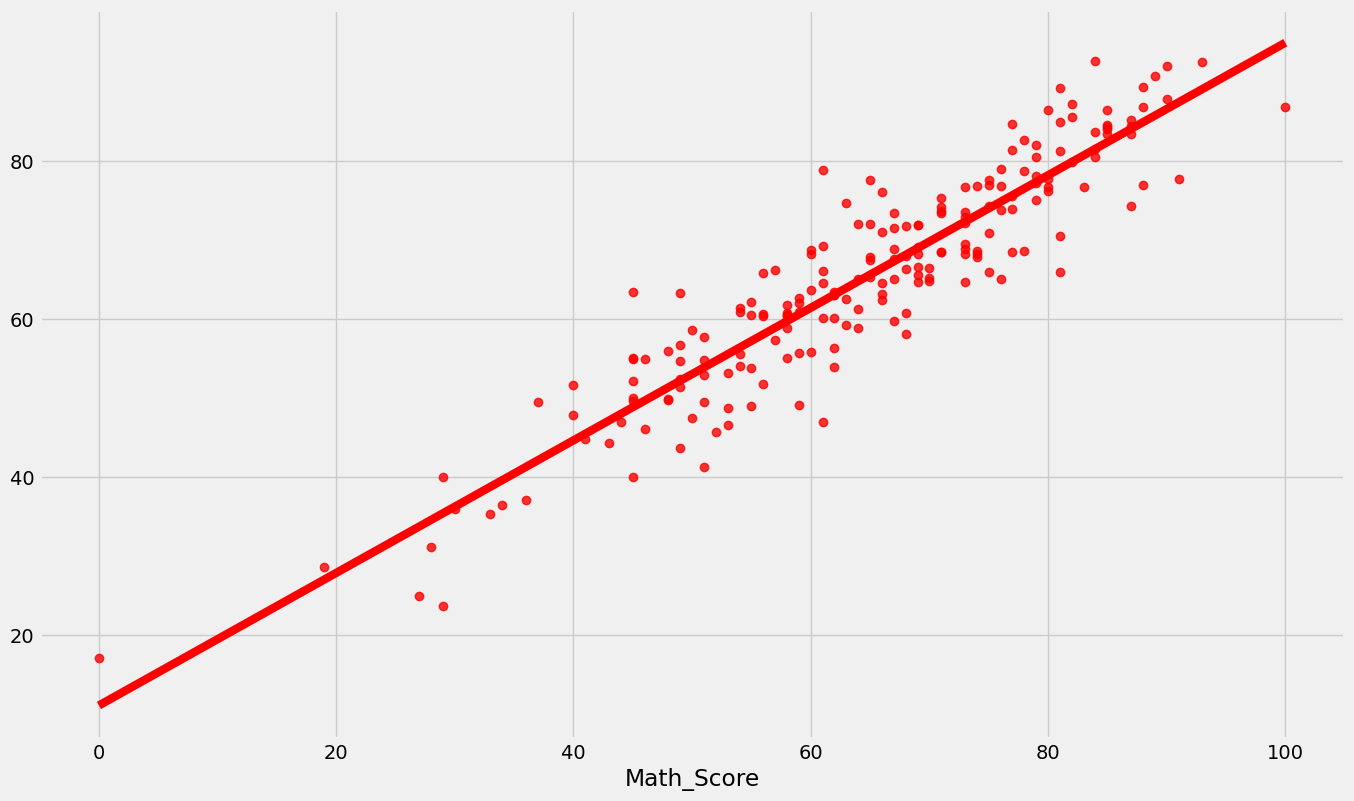

In [247]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [248]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,77.71,13.29
737,53,53.21,-0.21
740,80,76.27,3.73
660,74,76.83,-2.83
411,84,81.54,2.46
...,...,...,...
408,52,45.76,6.24
332,62,60.12,1.88
208,74,67.90,6.10
613,65,67.50,-2.50


In [249]:
# Create RandomForestRegressor model
rf_model = RandomForestRegressor()
# Train the model
rf_model.fit(X_train, y_train)
# Make predictions
y_pred = rf_model.predict(X_test)
# Evaluate the model
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f" % score)

Accuracy of the model is 85.16


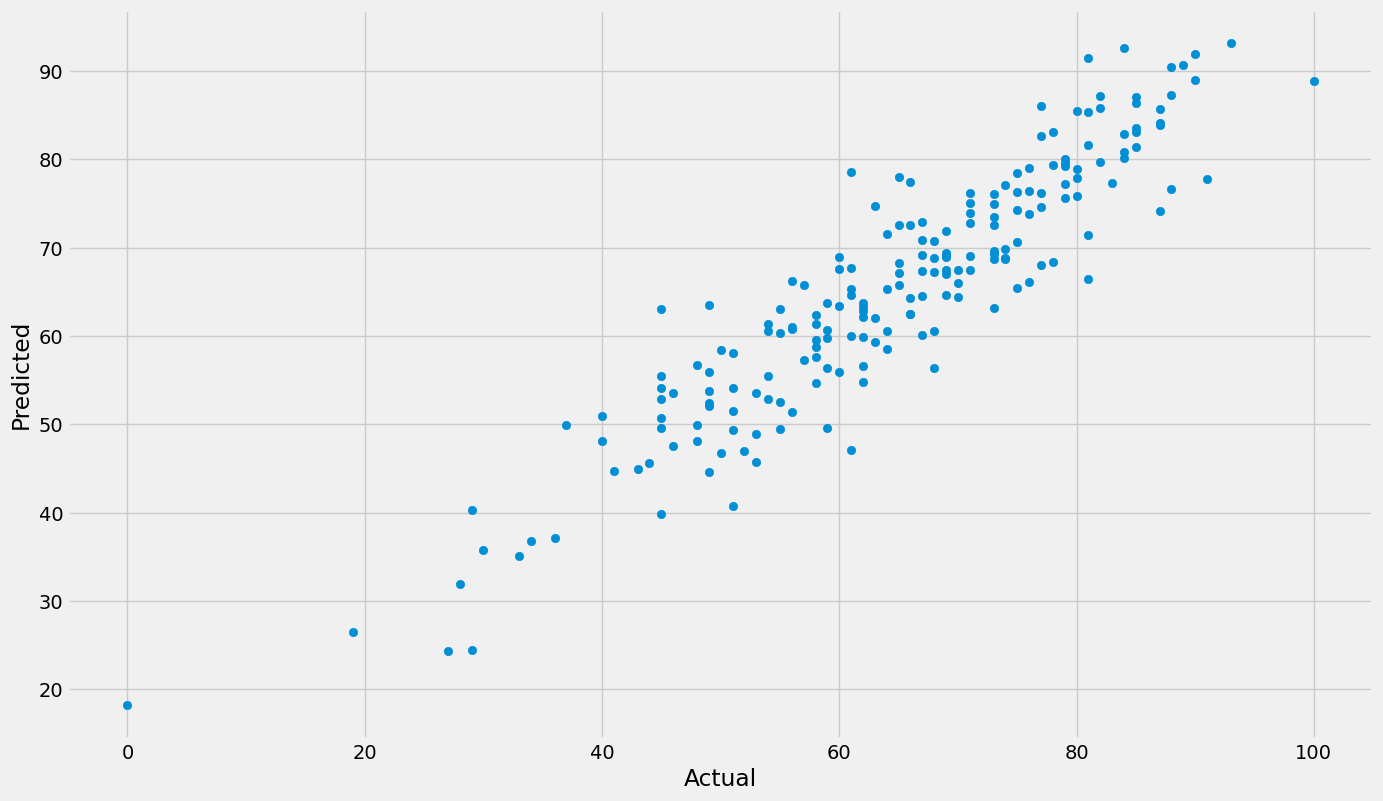

In [250]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

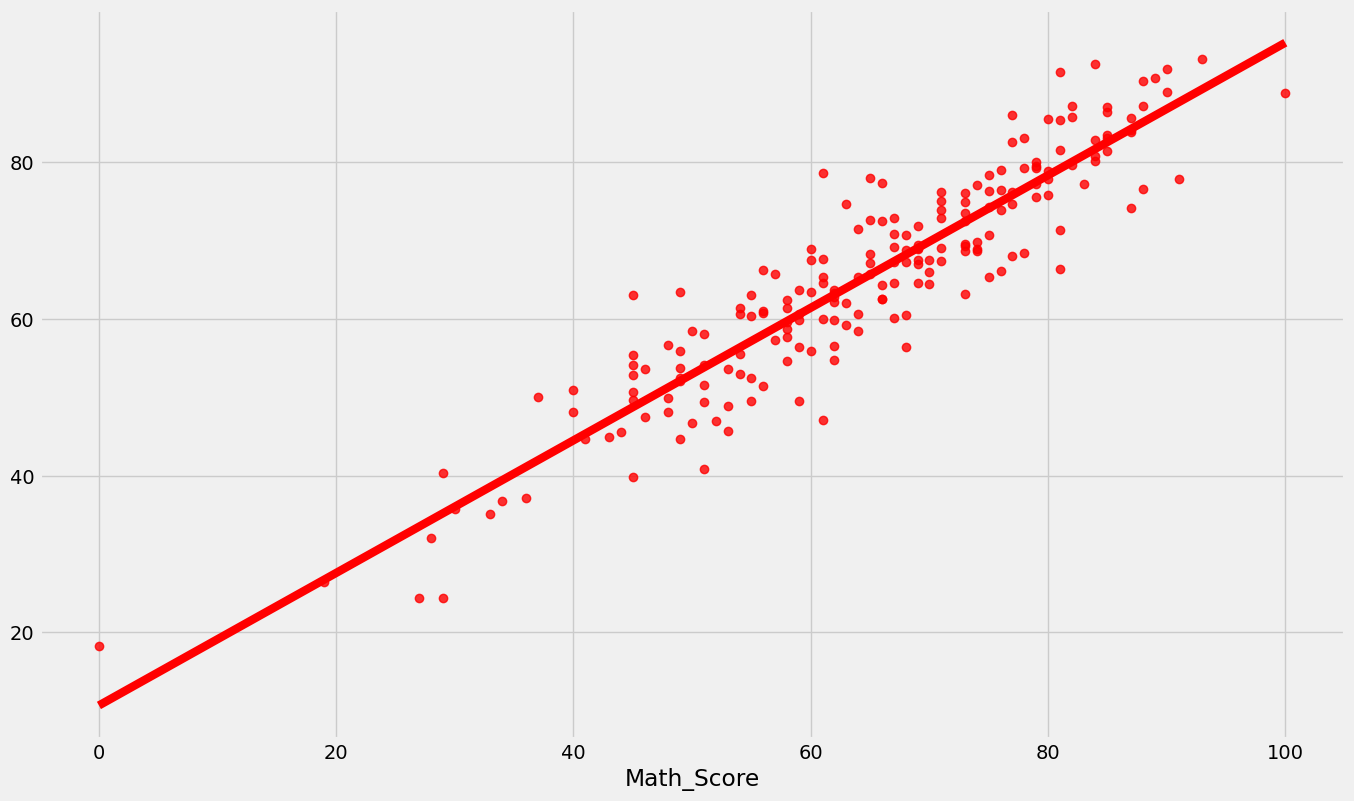

In [251]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');


In [252]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,77.82,13.18
737,53,53.56,-0.56
740,80,75.83,4.17
660,74,77.14,-3.14
411,84,80.20,3.80
...,...,...,...
408,52,47.03,4.97
332,62,59.92,2.08
208,74,68.70,5.30
613,65,67.20,-2.20


In [240]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
0,Linear Regression,0.880433
3,Random Forest Regressor,0.851648
5,CatBoosting Regressor,0.851632
4,XGBRegressor,0.827797
1,K-Neighbors Regressor,0.784030
2,Decision Tree,0.730766
